# Assignment 4.1

In this assignment, you'll try to calibrate a non-linear sensor to have a linear transfer function.

In [49]:
import matplotlib.pyplot as plt
import numpy as np

The following data is the collected raw sensor data from a key.

In [50]:
# Fine-grain measurement data (step = 0.1 mm)
disp_fine = np.arange(0.0, 4.1, 0.1)
key_fine  = [2325, 2307, 2297, 2290, 2283, 2273, 2266, 2258, 2247, 2231, 2232, 2220, 2210, 2197, 2170, 2157, 2149, 2133, 2112, 2094, 2081, 2054, 2031, 2007, 1982, 1953, 1921, 1884, 1852, 1817, 1779, 1739, 1707, 1647, 1592, 1531, 1461, 1383, 1305, 1219, 1129]

# Coarse-grain measurement data (step = 1.0 mm)
disp_coarse = np.arange(0.0, 4.5, 1.0)
key_coarse  = [2325, 2232, 2081, 1779, 1129]

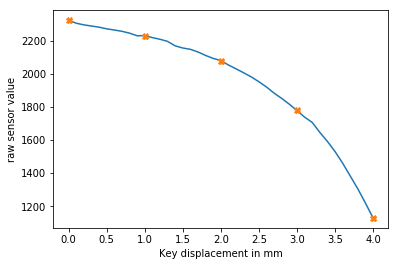

In [51]:
plt.plot(disp_fine, key_fine, "-")
plt.plot(disp_coarse, key_coarse, "X")
plt.xlabel('Key displacement in mm')
plt.ylabel('raw sensor value')
plt.show()
    

As you can see on the graph above, the sensor doesn't respond linearly to the displacement.

In this assignment, you'll need to calibrate the sensor to have a linear transfer function.

# Exercise

Try to implement a function named **calibrate** as follow.

>```def calibrate(sensor_value, value_table):```
> * **sensor_value**: A value read from sensor. It could be be **any integer number** between (0, 4096). Please take care of the boundary values.
> * **value_table**: A 2D array calibration data table. valueTable[0] is an array of displacements, and valueTable[1] is an array of raw sensor values.
> * **Return value**: the estimated key position in *mm*, given the **sensor_value**.

You will *only* use the coarse-grained data for the calibration.
You may use any library and add functions as much as you need.

In [52]:
from scipy.interpolate import interp1d

def calibrate(sensor_value, value_table):
    disp = value_table[0]
    value = value_table[1]
    
    # As an example implementation, it will simply interpolate
    # the range of raw values to the range of displacements.
    
    # REPLACE THE CODE BELOW WITH YOUR OWN IMPLEMENTATION.
    # =====================================================
    disp_start = disp[0]
    disp_end = disp[-1]
    
    value_start = value[0]
    value_end = value[-1]
    
    interpolation = interp1d([value_start, value_end], [disp_start, disp_end])
    
    return float(interpolation(sensor_value))

To verify your calibration, the following code section will plot the ideal transfer function and your calibrated transfer function, using the fine-grained measurement data.

The calibrated transfer function should be as linear as possible.

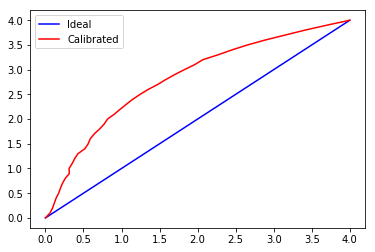

In [54]:
calibrated_disp = []
actual_disp = []

calibration_table = [disp_coarse, key_coarse]

for i in range(len(disp_fine)):
    val = key_fine[i]
    disp = disp_fine[i]
    
    estimated = calibrate(val, calibration_table)
    
    calibrated_disp.append(estimated)
    actual_disp.append(disp)
    
plt.plot(actual_disp, actual_disp, 'b-', label="Ideal")
plt.plot(calibrated_disp, actual_disp, 'r-', label="Calibrated")
plt.legend()
plt.show()
    

Hint: There are two possible approaches to handle this problem.
 1. You may want to try interpolation between values. This is easy, but will not give you the best result.
 2. You may try a model fitting. See the following pages for the help.
   - https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

# Reporting
* Jupyter notebook with your own **calibrate** function implementation.
* A pdf document that explains your apporach and the result.